# Анализ разницы между обновлениями в игре Hearthstone

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)



### Парсинг
В файле video_parcing.py я анализирую записи стримов компьютерной игры hearthstone. (ссылки на которые есть в файле /ExtractedData/videolinks.txt). 
Из них получаю шансы на победу, ничью и поражение в каждом раунде (обведены красным на фото).




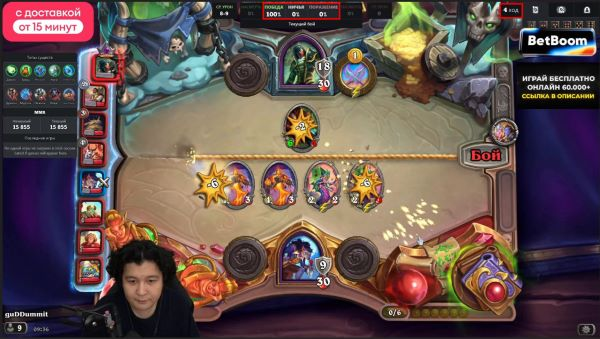

Для этого я подгружаю видео, беру из него кадр. Смотрю есть ли на нём нужные мне значения или таймер хода. Если нет, пропускаю 9 секунд и беру кадр снова.

Если есть таймер - пропускаю столько секунд, сколько на таймере, чтобы попасть сразу в конец хода, ведь именно там находятся нужные мне элементы.

Если есть шансы на победу, ничью, поражение - записываю их в файл и пропускаю 40 секунд, чтобы не получать одни и те же значения несколько раз т.к. они могут висеть на экране какое-то время.

### Анализ
Открываем все полученные после парсинга файлы и объединяем их в таблицу.

Столбцы:
* turn - номер игрового хода
* win_chance - шанс на победу в текущем бою
* tie_chance - шанс на ничью в текущем бою
* loss_chance - шанс на поражение в текущем бою
* date - дата анализируемого стрима
* stream_hour - час стрима (для парсинга я разбивал видео на часовые отрезки)
* player - играющий стример (Gdm: guDDumit)


In [23]:
file_path = "ExtractedData\AllData.txt"
column_names = ['turn', 'win_chance', 'tie_chance', 'loss_chance', 'date', 'stream_hour', 'player' ]

df = pd.read_csv(filepath_or_buffer=file_path, sep=' ', header=None, names=column_names)
print(df)

     turn win_chance tie_chance loss_chance      date stream_hour player
0       1        100          0           0  13.03.25          1h    GDM
1       2        100          0           0  13.03.25          1h    GDM
2      -1        100          0           0  13.03.25          1h    GDM
3       4        100          0           0  13.03.25          1h    GDM
4       5        0,1        0,1        99,8  13.03.25          1h    GDM
..    ...        ...        ...         ...       ...         ...    ...
253     8        100          0           0  26.01.25          5h    GDM
254     9        100          0           0  26.01.25          5h    GDM
255    10          0          0         100  26.01.25          5h    GDM
256    11        100          0           0  26.01.25          5h    GDM
257    12        100          0           0  26.01.25          5h    GDM

[258 rows x 7 columns]


Переведём столбцы win_chance tie_chance loss_chance во float

turn в int

In [24]:
pd.to_numeric(df['turn'])

for i in range(len(df['win_chance'])):
    df.loc[i,'win_chance']= float(str(df.loc[i,'win_chance']).strip('*').replace(',','.'))
for i in range(len(df['tie_chance'])):
    df.loc[i,'tie_chance']= float(str(df.loc[i,'tie_chance']).strip('*').replace(',','.'))
for i in range(len(df['loss_chance'])):
    df.loc[i,'loss_chance']= float(str(df.loc[i,'loss_chance']).strip('*').replace(',','.'))
print(df)

     turn win_chance tie_chance loss_chance      date stream_hour player
0       1      100.0        0.0         0.0  13.03.25          1h    GDM
1       2      100.0        0.0         0.0  13.03.25          1h    GDM
2      -1      100.0        0.0         0.0  13.03.25          1h    GDM
3       4      100.0        0.0         0.0  13.03.25          1h    GDM
4       5        0.1        0.1        99.8  13.03.25          1h    GDM
..    ...        ...        ...         ...       ...         ...    ...
253     8      100.0        0.0         0.0  26.01.25          5h    GDM
254     9      100.0        0.0         0.0  26.01.25          5h    GDM
255    10        0.0        0.0       100.0  26.01.25          5h    GDM
256    11      100.0        0.0         0.0  26.01.25          5h    GDM
257    12      100.0        0.0         0.0  26.01.25          5h    GDM

[258 rows x 7 columns]


В столбце turn есть значения -1. Они появляются там, когда по каким-то причинам мой код не смог считать номер хода с видео. Т.к. ходы идут последовательно, мы можем быть уверены, что между 3 и 5 ходом был 4ый. Такие пропуски можно заполнить.


In [25]:
for i in range (1,len(df['turn'])-1):
    if df.loc[i,'turn']==-1 and df.loc[i+1,'turn']-df.loc[i-1,'turn']==2:
        df.loc[i,'turn'] = df.loc[i-1,'turn']+1
    if df.loc[i,'turn']==-1 and df.loc[i+1,'turn']==2:
        df.loc[i,'turn'] = 1
print(df)
        

     turn win_chance tie_chance loss_chance      date stream_hour player
0       1      100.0        0.0         0.0  13.03.25          1h    GDM
1       2      100.0        0.0         0.0  13.03.25          1h    GDM
2       3      100.0        0.0         0.0  13.03.25          1h    GDM
3       4      100.0        0.0         0.0  13.03.25          1h    GDM
4       5        0.1        0.1        99.8  13.03.25          1h    GDM
..    ...        ...        ...         ...       ...         ...    ...
253     8      100.0        0.0         0.0  26.01.25          5h    GDM
254     9      100.0        0.0         0.0  26.01.25          5h    GDM
255    10        0.0        0.0       100.0  26.01.25          5h    GDM
256    11      100.0        0.0         0.0  26.01.25          5h    GDM
257    12      100.0        0.0         0.0  26.01.25          5h    GDM

[258 rows x 7 columns]


Добваим столбец в каком обновлении был сыгран этот матч. Последнее глобальное бновление было 18.02.25. Всё что до назовём vanila, всё что после - anomalies.

Этот параметр - главный объект исследования. Задача выявить между обновлениями разницу. Моя гипотеза заключается в том, что в текущем обновлении (anomalies, названо так в честь добавочной механики сезона) должно быть больше игр "в сухую", где 100% на победу или поражение. Должны быть ниже шансы на ничью и больше  дисперсия у распределений победы и поражения. 



In [26]:
import datetime
date_update = datetime.datetime(2025, 2, 25)
for i in range(len(df['date'])):
    if datetime.datetime(int("20"+df.loc[i,'date'].split('.')[2]),int(df.loc[i,'date'].split('.')[1]), int(df.loc[i,'date'].split('.')[0]))> date_update:
        df.loc[i,'update'] = 'anomalies'
    else:
        df.loc[i,'update'] = 'vanila'
# df['update'] = datetime.datetime(int("20"+df['date'].split('.')[2]),int(df['date'].split('.')[1]), int(df['date'].split('.')[0]))>date_update
print(df)

     turn win_chance tie_chance loss_chance      date stream_hour player  \
0       1      100.0        0.0         0.0  13.03.25          1h    GDM   
1       2      100.0        0.0         0.0  13.03.25          1h    GDM   
2       3      100.0        0.0         0.0  13.03.25          1h    GDM   
3       4      100.0        0.0         0.0  13.03.25          1h    GDM   
4       5        0.1        0.1        99.8  13.03.25          1h    GDM   
..    ...        ...        ...         ...       ...         ...    ...   
253     8      100.0        0.0         0.0  26.01.25          5h    GDM   
254     9      100.0        0.0         0.0  26.01.25          5h    GDM   
255    10        0.0        0.0       100.0  26.01.25          5h    GDM   
256    11      100.0        0.0         0.0  26.01.25          5h    GDM   
257    12      100.0        0.0         0.0  26.01.25          5h    GDM   

        update  
0    anomalies  
1    anomalies  
2    anomalies  
3    anomalies  
4 

Посмотрим на % игр со 100% победой/ничьёй/поражением в каждом обновлении. Я ожидаю увидеть болльше игр на 100% победу и меньше игр на 100% ничью.
Так оно и оказыватся

In [27]:
win100_anomalies = sum((df['win_chance']==100) & (df['update']== 'anomalies'))/sum(df['update']=='anomalies')*100
win100_vanila = sum((df['win_chance']==100) & (df['update']== 'vanila'))/sum(df['update']=='vanila')*100

tie100_anomalies = sum((df['tie_chance']==100) & (df['update']== 'anomalies'))/sum(df['update']=='anomalies')*100
tie100_vanila = sum((df['tie_chance']==100) & (df['update']== 'vanila'))/sum(df['update']=='vanila')*100

loss100_anomalies = sum((df['loss_chance']==100) & (df['update']== 'anomalies'))/sum(df['update']=='anomalies')*100
loss100_vanila = sum((df['loss_chance']==100) & (df['update']== 'vanila'))/sum(df['update']=='vanila')*100

print('win100_anomalies', round(win100_anomalies, 2), end='%\n')
print('win100_vanila', round(win100_vanila,2), end='%\n')
print()
print('tie100_anomalies', round(tie100_anomalies, 2), end='%\n')
print('tie100_vanila', round(tie100_vanila,2), end='%\n')
print()
print('loss100_anomalies', round(loss100_anomalies, 2), end='%\n')
print('loss100_vanila', round(loss100_vanila,2), end='%\n')


win100_anomalies 34.68%
win100_vanila 30.6%

tie100_anomalies 4.03%
tie100_vanila 7.46%

loss100_anomalies 16.94%
loss100_vanila 25.37%


Интересна также динамика количества игр "в сухую" по ходам

[7, 4, 11, 6, 1, 9, 9, 3, 5, 10, 10, 5, 2, 2, 0]


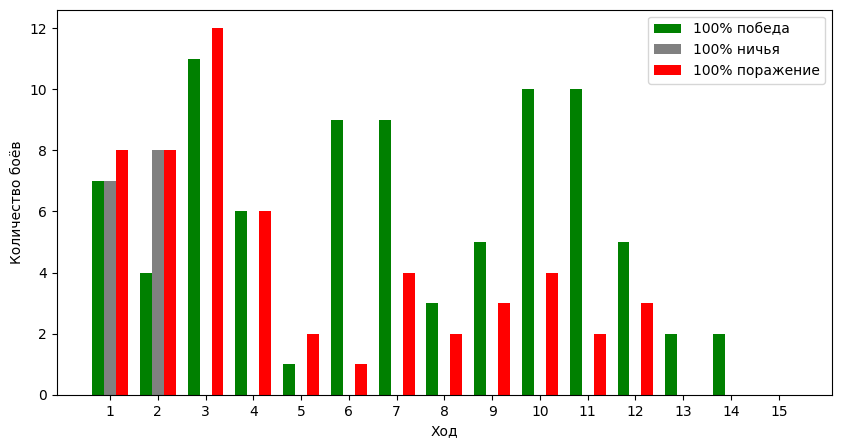

In [ ]:
win100_count = [0]*15
tie100_count = [0]*15
loss100_count = [0]*15

for i in range(len(df['turn'])):
    if df.loc[i,'win_chance']==100 and df.loc[i,'turn']!=-1:
        win100_count[df.loc[i,'turn']-1] +=1
    if df.loc[i,'tie_chance']==100 and df.loc[i,'turn']!=-1:
        tie100_count[df.loc[i,'turn']-1] +=1
    if df.loc[i,'loss_chance']==100 and df.loc[i,'turn']!=-1:
        loss100_count[df.loc[i,'turn']-1] +=1
        
x = list(range(1, 16))
bar_width = 0.25
index = np.arange(len(x))

plt.bar(index - bar_width, win100_count, bar_width, label='100% победа', color='green')
plt.bar(index, tie100_count, bar_width, label='100% ничья', color='gray')
plt.bar(index + bar_width, loss100_count, bar_width, label='100% поражение', color='red')

# Настройки графика
plt.xlabel('Ход')
plt.ylabel('Количество боёв')
plt.xticks(index, x)
plt.legend()

# Показать график
plt.show()


И давайте посмотрим на разницу между обновлениями. Для этого построим 3 отдельных графика и сравним количество игр "в сухую" до и после обновления

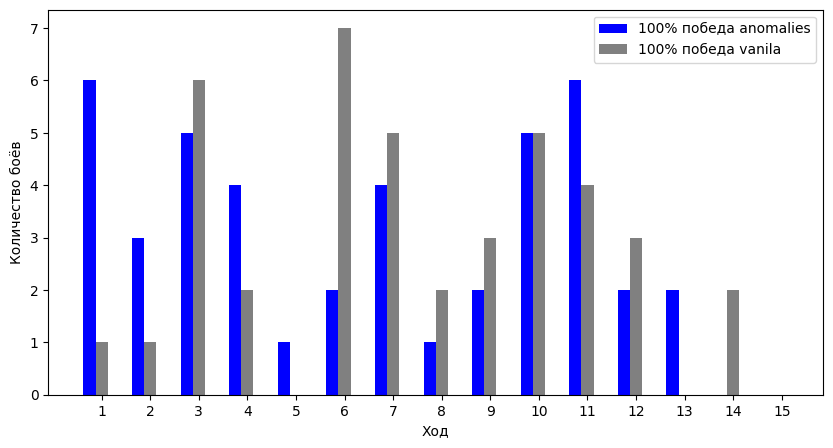

In [42]:
win100_count_anomalies = [0]*15
win100_count_vanila = [0]*15


for i in range(len(df['turn'])):
    if df.loc[i,'win_chance']==100 and df.loc[i,'update']=="anomalies"  and df.loc[i,'turn']!=-1:
        win100_count_anomalies[df.loc[i,'turn']-1] +=1
    if df.loc[i,'win_chance']==100 and df.loc[i,'update']=="vanila"  and df.loc[i,'turn']!=-1:
        win100_count_vanila[df.loc[i,'turn']-1] +=1

x = list(range(1, 16))
bar_width = 0.25
index = np.arange(len(x))

plt.bar(index - bar_width, win100_count_anomalies, bar_width, label='100% победа anomalies', color='blue')
plt.bar(index, win100_count_vanila, bar_width, label='100% победа vanila', color='gray')


# Настройки графика
plt.xlabel('Ход')
plt.ylabel('Количество боёв')
plt.xticks(index, x)
plt.legend()

# Показать график
plt.show()


На самом деле никакие выводы на этих данных сделать невозможно т.к. собрать big data у меня не получилось. Я не успел сделать парсинг видео по ссылке, а достаточно видео не скачаешь.